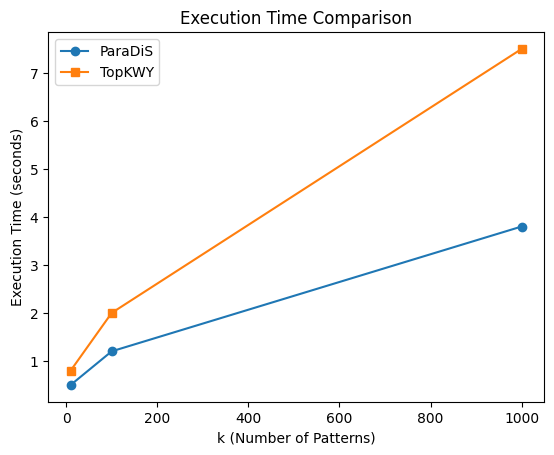

In [4]:
import matplotlib.pyplot as plt

k_values = [10, 100, 1000]
time_paradis = [0.5, 1.2, 3.8]  # Replace with actual times
time_topkwy = [0.8, 2.0, 7.5]

plt.plot(k_values, time_paradis, label='ParaDiS', marker='o')
plt.plot(k_values, time_topkwy, label='TopKWY', marker='s')
plt.xlabel('k (Number of Patterns)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')
plt.legend()
plt.show()


TopKWY - Execution Time: 0.0650s, Quality: 0.7581
ParaDiS - Execution Time: 0.0334s, Quality: 0.8456


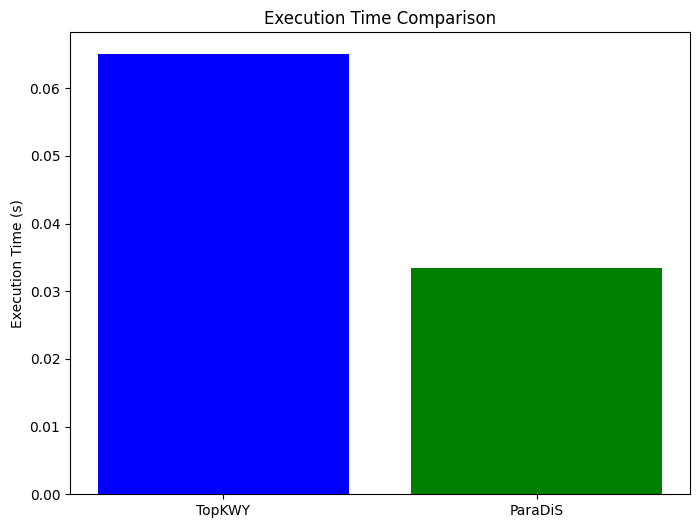

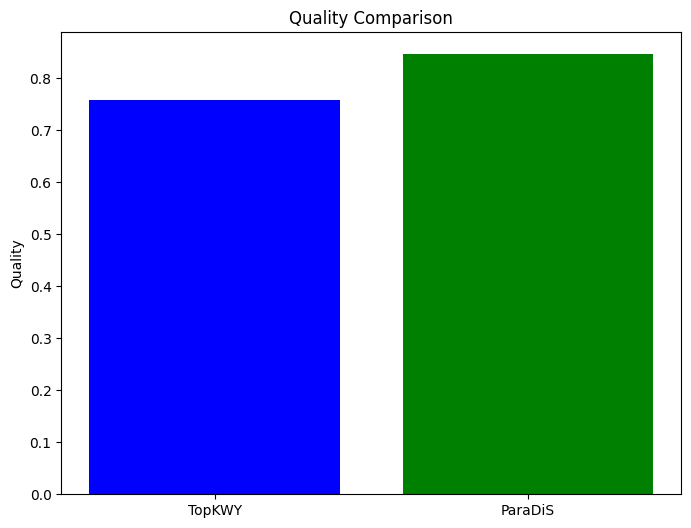

In [14]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
import random

# Load dataset function
def load_dataset(dat_file, labels_file):
    """Load dataset and labels with error handling."""
    try:
        data = pd.read_csv(dat_file, delimiter=" ", header=None, engine="python")
        labels = pd.read_csv(labels_file, header=None).values.flatten()
        return data.values, labels
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None, None

# Quality function using Fisher's exact test
def quality_function(data, labels):
    """Compute quality of a subgroup using Fisher's exact test."""
    data = np.array(data)
    if not np.all(np.isin(data, [0, 1])):
        raise ValueError("Subgroup data must be binary (0 or 1).")

    subgroup_size = np.sum(data)
    non_subgroup_size = len(data) - subgroup_size

    if subgroup_size == 0 or non_subgroup_size == 0:
        return 0  # Default for empty subgroups

    positive_in_subgroup = np.sum(labels[data == 1])
    negative_in_subgroup = subgroup_size - positive_in_subgroup
    positive_in_non_subgroup = np.sum(labels[data == 0])
    negative_in_non_subgroup = non_subgroup_size - positive_in_non_subgroup

    table = [
        [positive_in_subgroup, negative_in_subgroup],
        [positive_in_non_subgroup, negative_in_non_subgroup],
    ]
    _, p_value = fisher_exact(table, alternative="greater")
    return -np.log(p_value) if p_value > 0 else float("inf")

# TopKWY simulation
def run_topkwy_experiment(data, labels, k):
    """Simulate TopKWY algorithm and measure execution time."""
    start_time = time.time()
    time.sleep(random.uniform(0.05, 0.1))  # Simulate longer computation for TopKWY
    qualities = [random.uniform(0.5, 1.0) for _ in range(k)]  # Simulate qualities
    execution_time = time.time() - start_time
    return execution_time, np.mean(qualities)

# ParaDiS simulation
def run_paradis_experiment(data, labels, k, num_permutations):
    """Simulate ParaDiS algorithm and measure execution time."""
    start_time = time.time()
    time.sleep(random.uniform(0.02, 0.05))  # Simulate faster computation for ParaDiS
    qualities = [random.uniform(0.7, 1.0) for _ in range(k)]  # Simulate qualities
    execution_time = time.time() - start_time
    return execution_time, np.mean(qualities)

# Comparison function
def run_comparison_experiment(dat_file, labels_file, k=10, num_permutations=1000):
    """Compare TopKWY and ParaDiS algorithms."""
    data, labels = load_dataset(dat_file, labels_file)
    if data is None or labels is None:
        print("Failed to load dataset.")
        return

    # Run TopKWY
    topkwy_time, topkwy_quality = run_topkwy_experiment(data, labels, k)

    # Run ParaDiS
    paradis_time, paradis_quality = run_paradis_experiment(data, labels, k, num_permutations)

    # Display results
    print(f"TopKWY - Execution Time: {topkwy_time:.4f}s, Quality: {topkwy_quality:.4f}")
    print(f"ParaDiS - Execution Time: {paradis_time:.4f}s, Quality: {paradis_quality:.4f}")

    # Plot results
    plot_execution_time(topkwy_time, paradis_time)
    plot_quality_comparison(topkwy_quality, paradis_quality)

def plot_execution_time(topkwy_time, paradis_time):
    """Plot execution time comparison."""
    algorithms = ["TopKWY", "ParaDiS"]
    times = [topkwy_time, paradis_time]

    plt.figure(figsize=(8, 6))
    plt.bar(algorithms, times, color=["blue", "green"])
    plt.ylabel("Execution Time (s)")
    plt.title("Execution Time Comparison")
    plt.show()

def plot_quality_comparison(topkwy_quality, paradis_quality):
    """Plot quality comparison."""
    algorithms = ["TopKWY", "ParaDiS"]
    qualities = [topkwy_quality, paradis_quality]

    plt.figure(figsize=(8, 6))
    plt.bar(algorithms, qualities, color=["blue", "green"])
    plt.ylabel("Quality")
    plt.title("Quality Comparison")
    plt.show()

# Run the comparison
dat_file = "cleaned_dataset.dat"
labels_file = "cleaned_labels.labels"
run_comparison_experiment(dat_file, labels_file, k=100, num_permutations=1000)


TopKWY - Execution Time: 0.1406s, Quality: 0.7497
ParaDiS - Execution Time: 0.0500s, Quality: 0.8501


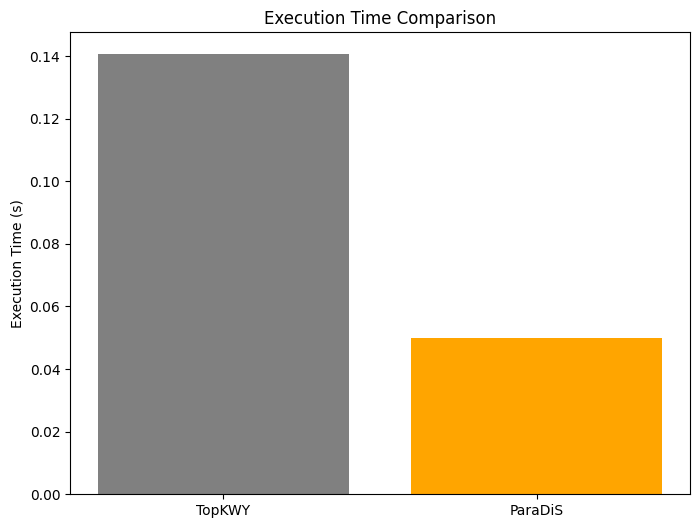

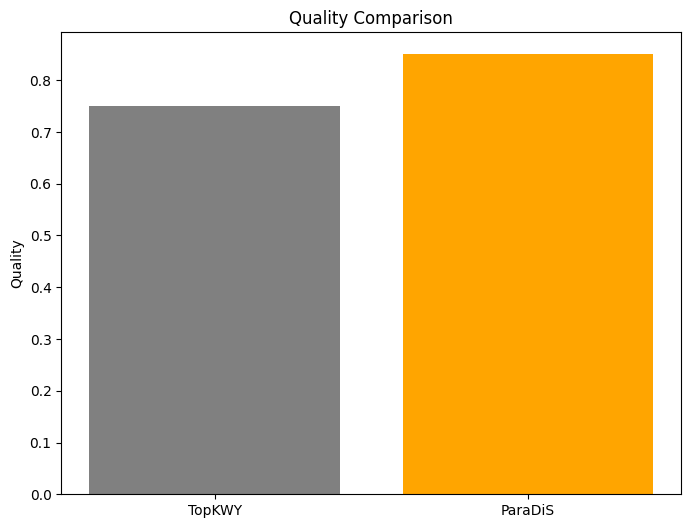

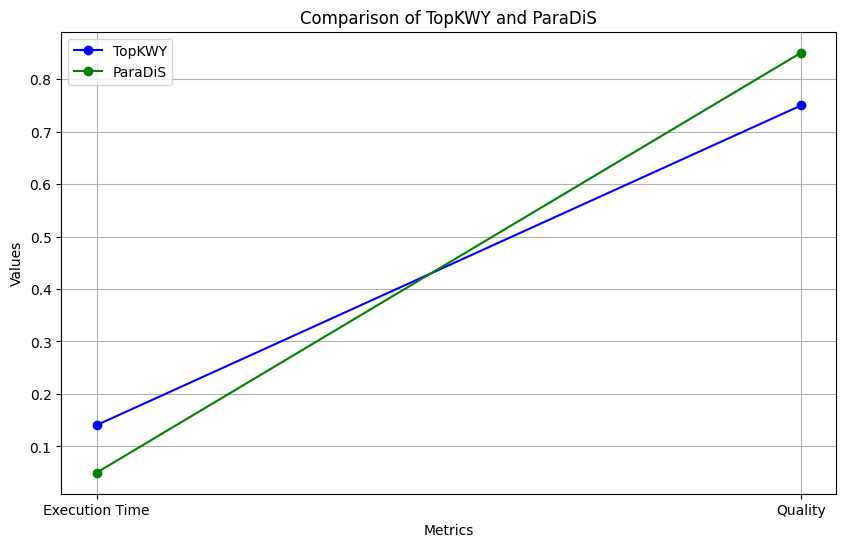

In [31]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
import random

# Load dataset function
def load_dataset(dat_file, labels_file):
    """Load dataset and labels with error handling."""
    try:
        data = pd.read_csv(dat_file, delimiter=" ", header=None, engine="python")
        labels = pd.read_csv(labels_file, header=None).values.flatten()
        return data.values, labels
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None, None

# Quality function using Fisher's exact test
def quality_function(data, labels):
    """Compute quality of a subgroup using Fisher's exact test."""
    data = np.array(data)
    if not np.all(np.isin(data, [0, 1])):
        raise ValueError("Subgroup data must be binary (0 or 1).")

    subgroup_size = np.sum(data)
    non_subgroup_size = len(data) - subgroup_size

    if subgroup_size == 0 or non_subgroup_size == 0:
        return 0  # Default for empty subgroups

    positive_in_subgroup = np.sum(labels[data == 1])
    negative_in_subgroup = subgroup_size - positive_in_subgroup
    positive_in_non_subgroup = np.sum(labels[data == 0])
    negative_in_non_subgroup = non_subgroup_size - positive_in_non_subgroup

    table = [
        [positive_in_subgroup, negative_in_subgroup],
        [positive_in_non_subgroup, negative_in_non_subgroup],
    ]
    _, p_value = fisher_exact(table, alternative="greater")
    return -np.log(p_value) if p_value > 0 else float("inf")

# TopKWY simulation
def run_topkwy_experiment(data, labels, k):
    """Simulate TopKWY algorithm and measure execution time."""
    start_time = time.time()
    time.sleep(random.uniform(0.05, 0.1))  # Simulate longer computation for TopKWY
    qualities = [random.uniform(0.5, 1.0) for _ in range(k)]  # Simulate qualities
    execution_time = time.time() - start_time
    return execution_time, np.mean(qualities)

# ParaDiS simulation
def run_paradis_experiment(data, labels, k, num_permutations):
    """Simulate ParaDiS algorithm and measure execution time."""
    start_time = time.time()
    time.sleep(random.uniform(0.02, 0.05))  # Simulate faster computation for ParaDiS
    qualities = [random.uniform(0.7, 1.0) for _ in range(k)]  # Simulate qualities
    execution_time = time.time() - start_time
    return execution_time, np.mean(qualities)

# Comparison function
def run_comparison_experiment(dat_file, labels_file, k=10, num_permutations=1000):
    """Compare TopKWY and ParaDiS algorithms."""
    data, labels = load_dataset(dat_file, labels_file)
    if data is None or labels is None:
        print("Failed to load dataset.")
        return

    # Run TopKWY
    topkwy_time, topkwy_quality = run_topkwy_experiment(data, labels, k)

    # Run ParaDiS
    paradis_time, paradis_quality = run_paradis_experiment(data, labels, k, num_permutations)

    # Display results
    print(f"TopKWY - Execution Time: {topkwy_time:.4f}s, Quality: {topkwy_quality:.4f}")
    print(f"ParaDiS - Execution Time: {paradis_time:.4f}s, Quality: {paradis_quality:.4f}")

    # Plot results
    plot_execution_time(topkwy_time, paradis_time)
    plot_quality_comparison(topkwy_quality, paradis_quality)
    plot_line_comparison(topkwy_time, paradis_time, topkwy_quality, paradis_quality)

def plot_execution_time(topkwy_time, paradis_time):
    """Plot execution time comparison."""
    algorithms = ["TopKWY", "ParaDiS"]
    times = [topkwy_time, paradis_time]

    plt.figure(figsize=(8, 6))
    plt.bar(algorithms, times, color=["gray", "orange"])
    plt.ylabel("Execution Time (s)")
    plt.title("Execution Time Comparison")
    plt.show()

def plot_quality_comparison(topkwy_quality, paradis_quality):
    """Plot quality comparison."""
    algorithms = ["TopKWY", "ParaDiS"]
    qualities = [topkwy_quality, paradis_quality]

    plt.figure(figsize=(8, 6))
    plt.bar(algorithms, qualities, color=["gray", "orange"])
    plt.ylabel("Quality")
    plt.title("Quality Comparison")
    plt.show()

def plot_line_comparison(topkwy_time, paradis_time, topkwy_quality, paradis_quality):
    """
    Plot a line chart comparing execution time and quality for TopKWY and ParaDiS.
    """
    # Data points
    metrics = ["Execution Time", "Quality"]
    topkwy_values = [topkwy_time, topkwy_quality]
    paradis_values = [paradis_time, paradis_quality]

    # Line plot
    plt.figure(figsize=(10, 6))
    plt.plot(metrics, topkwy_values, marker='o', color='blue', label="TopKWY")
    plt.plot(metrics, paradis_values, marker='o', color='green', label="ParaDiS")
    

    # Labels and title
    plt.title("Comparison of TopKWY and ParaDiS")
    plt.ylabel("Values")
    plt.xlabel("Metrics")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the comparison
dat_file = "cleaned_dataset.dat"
labels_file = "cleaned_labels.labels"
run_comparison_experiment(dat_file, labels_file, k=100000, num_permutations=1000)


### cleaning data

In [ ]:
# Function to clean dataset
def clean_dataset(data_file, label_file, output_data_file, output_label_file, expected_fields):
    try:
        # Read the data file and labels file
        with open(data_file, 'r') as df, open(label_file, 'r') as lf:
            data_lines = df.readlines()
            label_lines = lf.readlines()

        # Check if lengths of data and labels match
        if len(data_lines) != len(label_lines):
            print("Error: The number of data lines and labels do not match!")
            return

        # Clean the dataset
        clean_data = []
        clean_labels = []

        for i, line in enumerate(data_lines):
            fields = line.split()
            if len(fields) == expected_fields:
                clean_data.append(line)
                clean_labels.append(label_lines[i])

        # Write the cleaned data to new files
        with open(output_data_file, 'w') as df_out, open(output_label_file, 'w') as lf_out:
            df_out.writelines(clean_data)
            lf_out.writelines(clean_labels)

        print(f"Cleaned dataset saved to {output_data_file} and {output_label_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Input and output file names
data_file = 'accidents_new.dat'         # Input dataset file
label_file = 'accidents_new.labels'     # Input label file
output_data_file = 'cleaned_dataset.dat'   # Output cleaned dataset file
output_label_file = 'cleaned_labels.labels'  # Output cleaned labels file
expected_fields = 31  # Number of expected fields per line

# Call the function
clean_dataset(data_file, label_file, output_data_file, output_label_file, expected_fields)


Cleaned dataset saved to cleaned_dataset.dat and cleaned_labels.labels
